## 1. Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_df = pd.read_csv("./data/loan.csv", parse_dates=['applicationDate', 'originatedDate'])
payment_df = pd.read_csv("./data/payment.csv")
underwriting_df = pd.read_csv("./data/clarity_underwriting_variables.csv")

/var/folders/nf/b3l22bv90bz1wwsyxnxnbkgc0000gp/T/ipykernel_12377/1454241481.py:7: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  underwriting_df = pd.read_csv("./data/clarity_underwriting_variables.csv")


In [2]:
print(f'Loan df shape :{loan_df.shape}')
print(f'Payment df shape :{payment_df.shape}')
print(f'Underwriting df shape :{underwriting_df.shape}')

Loan df shape :(577682, 19)
Payment df shape :(689364, 9)
Underwriting df shape :(49752, 54)


### 1.1 Merging DataFrame

In [3]:
df = pd.merge(loan_df, underwriting_df, left_on="clarityFraudId", right_on="underwritingid", how="left")
df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Selecting Only Loans that have been funded

In [4]:
df = df[df['isFunded'] == 1]

In [5]:
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28T19:54:22.982000,True,2016-11-29T20:30:40.640000,2.0,True,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01T15:55:41.823000,True,2017-03-01T16:15:13.016000,0.0,True,1,...,(U) Unlisted,match,NaN,NaN,NaN,NaN,match,1.0,658.0,58b6eef8e4b0b6fca82fd426
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31T17:48:17.381000,True,2017-01-31T18:00:14.520000,2.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,835.0,58450a15e4b0bb9d6d7344c7
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27T09:08:05.442000,True,2016-08-29T15:05:04.014000,0.0,True,1,...,(P) Pager,match,NaN,NaN,NaN,NaN,match,1.0,624.0,578f9346e4b0810ad5e7b72e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,2016-12-01T16:57:49.231000,True,2016-12-01T17:28:21.872000,3.0,True,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,2017-01-14T19:43:08.685000,True,2017-01-14T20:00:10.426000,0.0,True,1,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,700.0,587a7f49e4b08f2485d48358
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,2016-06-22T01:10:50.110000,True,2016-06-22T21:46:54.359000,0.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,806.0,5769e592e4b0ab6c50364d45
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,2016-12-30T15:49:39.785000,True,2016-12-30T16:00:12.500000,0.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,769.0,58668211e4b08f246e282356


### 1.2 Selecting Only Relevant Columns for loan default prediction

In [6]:
# Drop irrelevant columns
df = df[["loanId", "anon_ssn", "payFrequency", "apr", "applicationDate", "originatedDate", "nPaidOff", "loanStatus",
         "loanAmount", "originallyScheduledPaymentAmount", "state", "leadType", "leadCost", "fpStatus", "clearfraudscore"]]

In [7]:
print(f'df shape : {df.shape}')
df.head()

df shape : (38982, 15)


,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clearfraudscore
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,2016-01-20T15:49:18.846000,0.0,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,879.0
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28T19:54:22.982000,2016-11-29T20:30:40.640000,2.0,New Loan,350.0,893.88,MO,organic,0,Checked,NaN
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01T15:55:41.823000,2017-03-01T16:15:13.016000,0.0,New Loan,400.0,1364.87,NJ,lead,40,Checked,658.0
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31T17:48:17.381000,2017-01-31T18:00:14.520000,2.0,Paid Off Loan,1250.0,3313.78,MO,organic,0,Checked,835.0
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27T09:08:05.442000,2016-08-29T15:05:04.014000,0.0,Paid Off Loan,800.0,2432.08,CA,bvMandatory,10,Checked,624.0


### 1.3 Chronological Sorting

In [8]:
df = df.sort_values(by="applicationDate")

In [9]:
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clearfraudscore
169457,LL-I-00000021,3e02899b53aa4877f9823b8ed5d5a6f1,B,478.67,2014-12-03T00:31:22.306000,2014-12-03T03:12:58.466000,NaN,Settlement Paid Off,800.0,2035.32,OH,lead,25,Checked,NaN
229094,LL-I-00000231,8775996c9eb007d33a874648e3857e82,B,478.67,2014-12-03T00:39:02.866000,2014-12-02T17:47:22,NaN,External Collection,800.0,1919.28,OH,lead,6,Checked,NaN
116604,LL-I-00000238,9e70eecb9c114068d5ef4431a40f7d66,B,478.67,2014-12-03T00:39:07.767000,2014-12-04T17:26:49.668000,NaN,External Collection,800.0,1919.28,OH,lead,25,Checked,NaN
151364,LL-I-00000308,6860de82ee70ce65b8df8f3cee51dff5,S,705.59,2014-12-03T00:41:27.773000,2014-12-03T03:12:56.416000,NaN,External Collection,200.0,739.08,OH,lead,25,Checked,NaN
555793,LL-I-00000355,37b6d5d2c65aa5693d52405046102679,B,478.67,2014-12-03T00:43:10.714000,2014-12-03T03:12:55.376000,NaN,External Collection,500.0,1199.55,OH,lead,25,Rejected,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444971,LL-I-18628728,af1997af680cbdb12cd4332904a5c72a,S,199.00,2017-03-18T23:20:54.652000,2017-03-21T12:43:20.204000,1.0,New Loan,2600.0,9775.69,CA,organic,0,Checked,NaN
155458,LL-I-18628898,0856604a7c53dc196028294ceaeafb35,S,199.00,2017-03-18T23:27:17.159000,2017-03-19T01:00:09.167000,0.0,New Loan,3000.0,10115.60,CA,lead,40,Checked,NaN
209082,LL-I-18629093,15e94be6020eb57b1849901a31e2b585,B,645.00,2017-03-18T23:34:27.369000,2017-03-19T00:15:16.291000,1.0,Paid Off Loan,500.0,1755.78,FL,organic,0,Checked,836.0
542600,LL-I-18629196,9bd94f442332480fcd1af9a57da7bd14,B,360.00,2017-03-18T23:38:50.917000,2017-03-18T23:45:05.393000,0.0,Returned Item,1500.0,3222.20,IL,lead,25,Rejected,NaN


### 1.4 Visualization

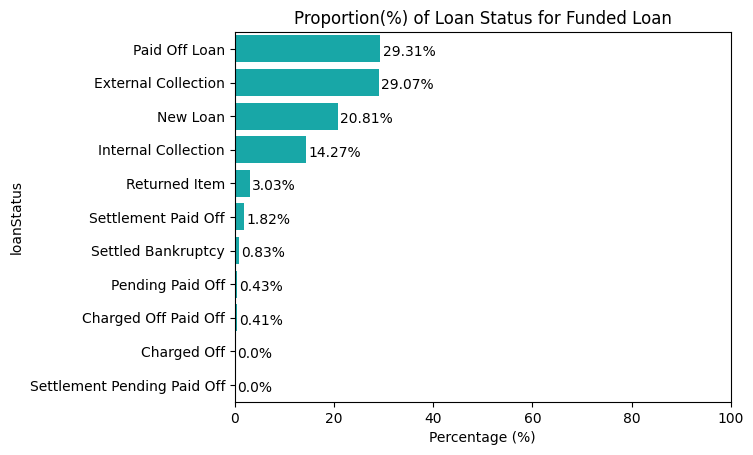

In [10]:
funded_loan = loan_df[loan_df['isFunded'] == 1]
funded_loan_status_cat = round(funded_loan['loanStatus'].value_counts(normalize=True).mul(100), 2).to_frame(name='pct')

ax = sns.barplot(data=funded_loan_status_cat, y=funded_loan_status_cat.index, x='pct', color='c')
ax.set_title('Proportion(%) of Loan Status for Funded Loan')
ax.set_xlabel('Percentage (%)')
ax.set(xlim=(0,100))

for p in ax.patches:
    txt = str(p.get_width().round(2)) + '%'
    txt_x = p.get_width() + 0.5
    txt_y = p.get_y() + 0.6
    ax.text(txt_x,txt_y,txt)

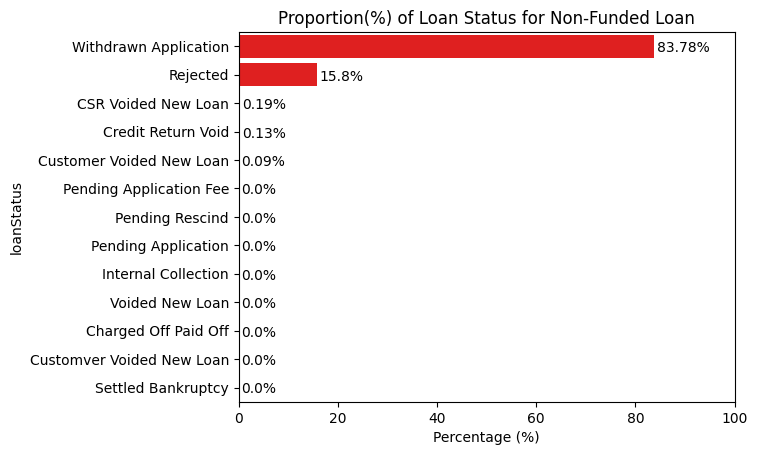

In [11]:
not_funded_loan = loan_df[loan_df['isFunded'] == 0]
not_funded_loan_status_cat = round(not_funded_loan['loanStatus'].value_counts(normalize=True).mul(100), 2).to_frame(name='pct')

ax = sns.barplot(data=not_funded_loan_status_cat, y=not_funded_loan_status_cat.index, x='pct', color='red')
ax.set_title('Proportion(%) of Loan Status for Non-Funded Loan')
ax.set_xlabel('Percentage (%)')
ax.set(xlim=(0,100))

for p in ax.patches:
    txt = str(p.get_width().round(2)) + '%'
    txt_x = p.get_width() + 0.5
    txt_y = p.get_y() + 0.6
    ax.text(txt_x,txt_y,txt)

## 2. Data Cleaning

In [12]:
percentage_missing_values_df = (df.isnull().mean() * 100).sort_values(ascending=False)
print(percentage_missing_values_df)

clearfraudscore                     17.685085
nPaidOff                             0.053871
fpStatus                             0.023088
payFrequency                         0.000000
apr                                  0.000000
anon_ssn                             0.000000
loanId                               0.000000
originatedDate                       0.000000
applicationDate                      0.000000
loanStatus                           0.000000
loanAmount                           0.000000
state                                0.000000
originallyScheduledPaymentAmount     0.000000
leadCost                             0.000000
leadType                             0.000000
dtype: float64


In [13]:
df['originatedDate']

169457    2014-12-03T03:12:58.466000
229094           2014-12-02T17:47:22
116604    2014-12-04T17:26:49.668000
151364    2014-12-03T03:12:56.416000
555793    2014-12-03T03:12:55.376000
                     ...            
444971    2017-03-21T12:43:20.204000
155458    2017-03-19T01:00:09.167000
209082    2017-03-19T00:15:16.291000
542600    2017-03-18T23:45:05.393000
191256    2017-03-19T00:00:13.779000
Name: originatedDate, Length: 38982, dtype: object

In [14]:
# Convert columns to datetime format using ISO 8601 format
df['originatedDate'] = pd.to_datetime(df['originatedDate'], format='mixed')
df['applicationDate'] = pd.to_datetime(df['applicationDate'], format='mixed')

## 3. Feature Engineering

In [15]:
# Default vs Non-Default Classification

| Loan Status                   | Category               | Justification                                                                                         |
|-------------------------------|------------------------|-------------------------------------------------------------------------------------------------------|
| Paid Off Loan                 | Not Related to Default | Loan has been fully paid off without issues; no default involved.                                      |
| New Loan                      | Not Related to Default | Represents a newly issued loan; no default has occurred yet.                                           |
| Pending Paid Off              | Not Related to Default | Loan is in the process of being paid off; not in default.                                              |
| Internal Collection           | Related to Default     | Indicates that the loan is in default and is being handled by the lender's internal collection team.   |
| External Collection           | Related to Default     | Indicates that the loan is in default and has been sent to an external collection agency.              |
| Returned Item                 | Related to Default     | Missed a payment due to insufficient funds; indicates potential default situation.                     |
| Charged Off Paid Off          | Related to Default     | Loan was charged off (defaulted) but has since been paid off.                                          |
| Settled Bankruptcy            | Related to Default     | Indicates the loan was involved in bankruptcy proceedings, usually implying default.                   |
| Settlement Paid Off           | Related to Default     | Indicates a settlement was reached and paid off, typically after a default situation.                  |
| Charged Off                   | Related to Default     | Indicates the loan has been written off as a loss due to default.                                      |
| Settlement Pending Paid Off   | Related to Default     | Loan is in the process of being settled and paid off, typically following default.                     |


In [16]:
default_classes = ['Internal Collection', 'External Collection', 'Returned Item', 
                   'Charged Off Paid Off', 'Settled Bankruptcy', 'Settlement Paid Off', 'Charged Off', 
                   'Settlement Paid Off']
paid_off_classes = ['Paid Off Loan', "New Loan", "Pending Paid Off"]

df.loc[df['loanStatus'].isin(default_classes).values, 'target'] = 1
df.loc[df['loanStatus'].isin(paid_off_classes).values, 'target'] = 0
df = df.loc[~df['target'].isnull()].reset_index(drop=True)

In [17]:
# Calculate the difference in hours
df['app_processing_hours'] = (df['originatedDate'] - df['applicationDate']).dt.total_seconds() / 3600

In [18]:
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clearfraudscore,target,app_processing_hours
0,LL-I-00000021,3e02899b53aa4877f9823b8ed5d5a6f1,B,478.67,2014-12-03 00:31:22.306,2014-12-03 03:12:58.466,NaN,Settlement Paid Off,800.0,2035.32,OH,lead,25,Checked,NaN,1.0,2.693378
1,LL-I-00000231,8775996c9eb007d33a874648e3857e82,B,478.67,2014-12-03 00:39:02.866,2014-12-02 17:47:22.000,NaN,External Collection,800.0,1919.28,OH,lead,6,Checked,NaN,1.0,-6.861352
2,LL-I-00000238,9e70eecb9c114068d5ef4431a40f7d66,B,478.67,2014-12-03 00:39:07.767,2014-12-04 17:26:49.668,NaN,External Collection,800.0,1919.28,OH,lead,25,Checked,NaN,1.0,40.794973
3,LL-I-00000308,6860de82ee70ce65b8df8f3cee51dff5,S,705.59,2014-12-03 00:41:27.773,2014-12-03 03:12:56.416,NaN,External Collection,200.0,739.08,OH,lead,25,Checked,NaN,1.0,2.524623
4,LL-I-00000355,37b6d5d2c65aa5693d52405046102679,B,478.67,2014-12-03 00:43:10.714,2014-12-03 03:12:55.376,NaN,External Collection,500.0,1199.55,OH,lead,25,Rejected,NaN,1.0,2.495739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38976,LL-I-18628728,af1997af680cbdb12cd4332904a5c72a,S,199.00,2017-03-18 23:20:54.652,2017-03-21 12:43:20.204,1.0,New Loan,2600.0,9775.69,CA,organic,0,Checked,NaN,0.0,61.373764
38977,LL-I-18628898,0856604a7c53dc196028294ceaeafb35,S,199.00,2017-03-18 23:27:17.159,2017-03-19 01:00:09.167,0.0,New Loan,3000.0,10115.60,CA,lead,40,Checked,NaN,0.0,1.547780
38978,LL-I-18629093,15e94be6020eb57b1849901a31e2b585,B,645.00,2017-03-18 23:34:27.369,2017-03-19 00:15:16.291,1.0,Paid Off Loan,500.0,1755.78,FL,organic,0,Checked,836.0,0.0,0.680256
38979,LL-I-18629196,9bd94f442332480fcd1af9a57da7bd14,B,360.00,2017-03-18 23:38:50.917,2017-03-18 23:45:05.393,0.0,Returned Item,1500.0,3222.20,IL,lead,25,Rejected,NaN,1.0,0.104021


In [19]:
# Convert 'target' column to int if it's not already
df['target'] = df['target'].astype(int)

## 4. Explanatory Data Analysis

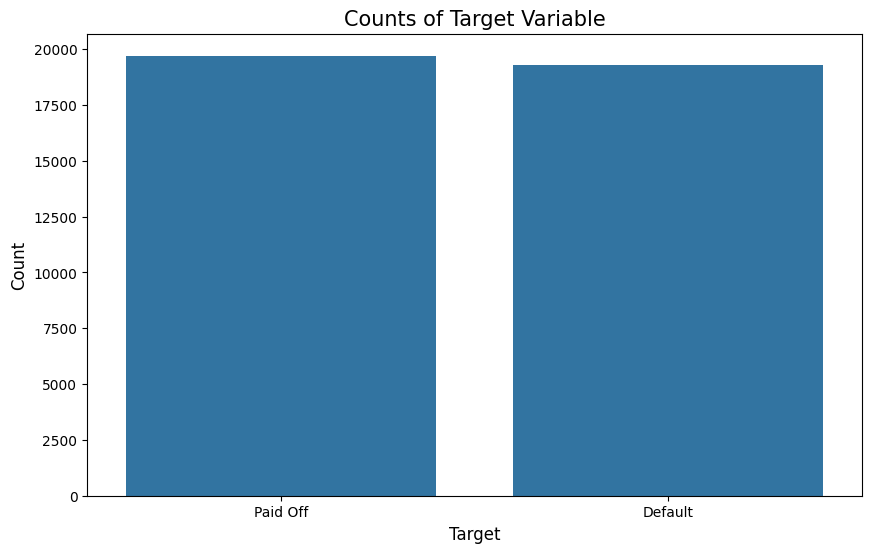

In [20]:
# Create a count plot for the 'target' variable
plt.figure(figsize=(10, 6))

sns.countplot(x='target', data=df)
plt.xticks(ticks=[0, 1], labels=['Paid Off', 'Default'])
plt.title('Counts of Target Variable', fontsize=15)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


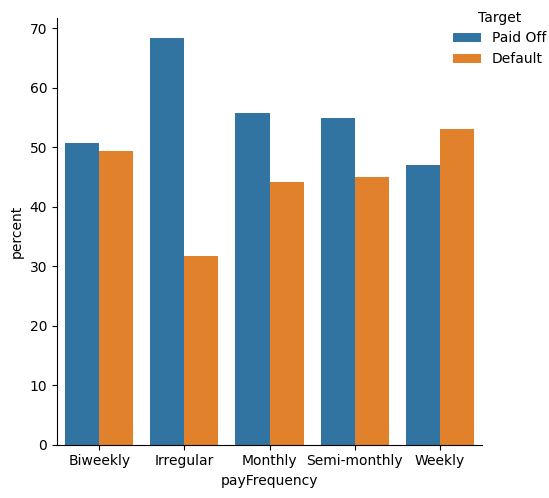

In [21]:
x,y = 'payFrequency', 'target'

df1 = df.copy()
# Define the mapping
mapping = {
    "B": "Biweekly",
    "I": "Irregular",
    "M": "Monthly",
    "S": "Semi-monthly",
    "W": "Weekly"
}
# Apply the mapping to the 'payFrequency' column
df1[x] = df1[x].replace(mapping)

df1 = df1.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
# g.ax.set_ylim(0,100)
# g.set_xticklabels(['Biweekly', 'Irregular', 'Monthly', 'Semi monthly', 'weekly'])

legend = g._legend
legend.set_title("Target")
for t, l in zip(legend.texts,("Paid Off", "Default")):
    t.set_text(l)

# Move the legend to the top right
g._legend.set_bbox_to_anchor((1, 1))
g._legend.set_loc('upper right')

/var/folders/nf/b3l22bv90bz1wwsyxnxnbkgc0000gp/T/ipykernel_12377/3965407042.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Paid Off', 'Default'])


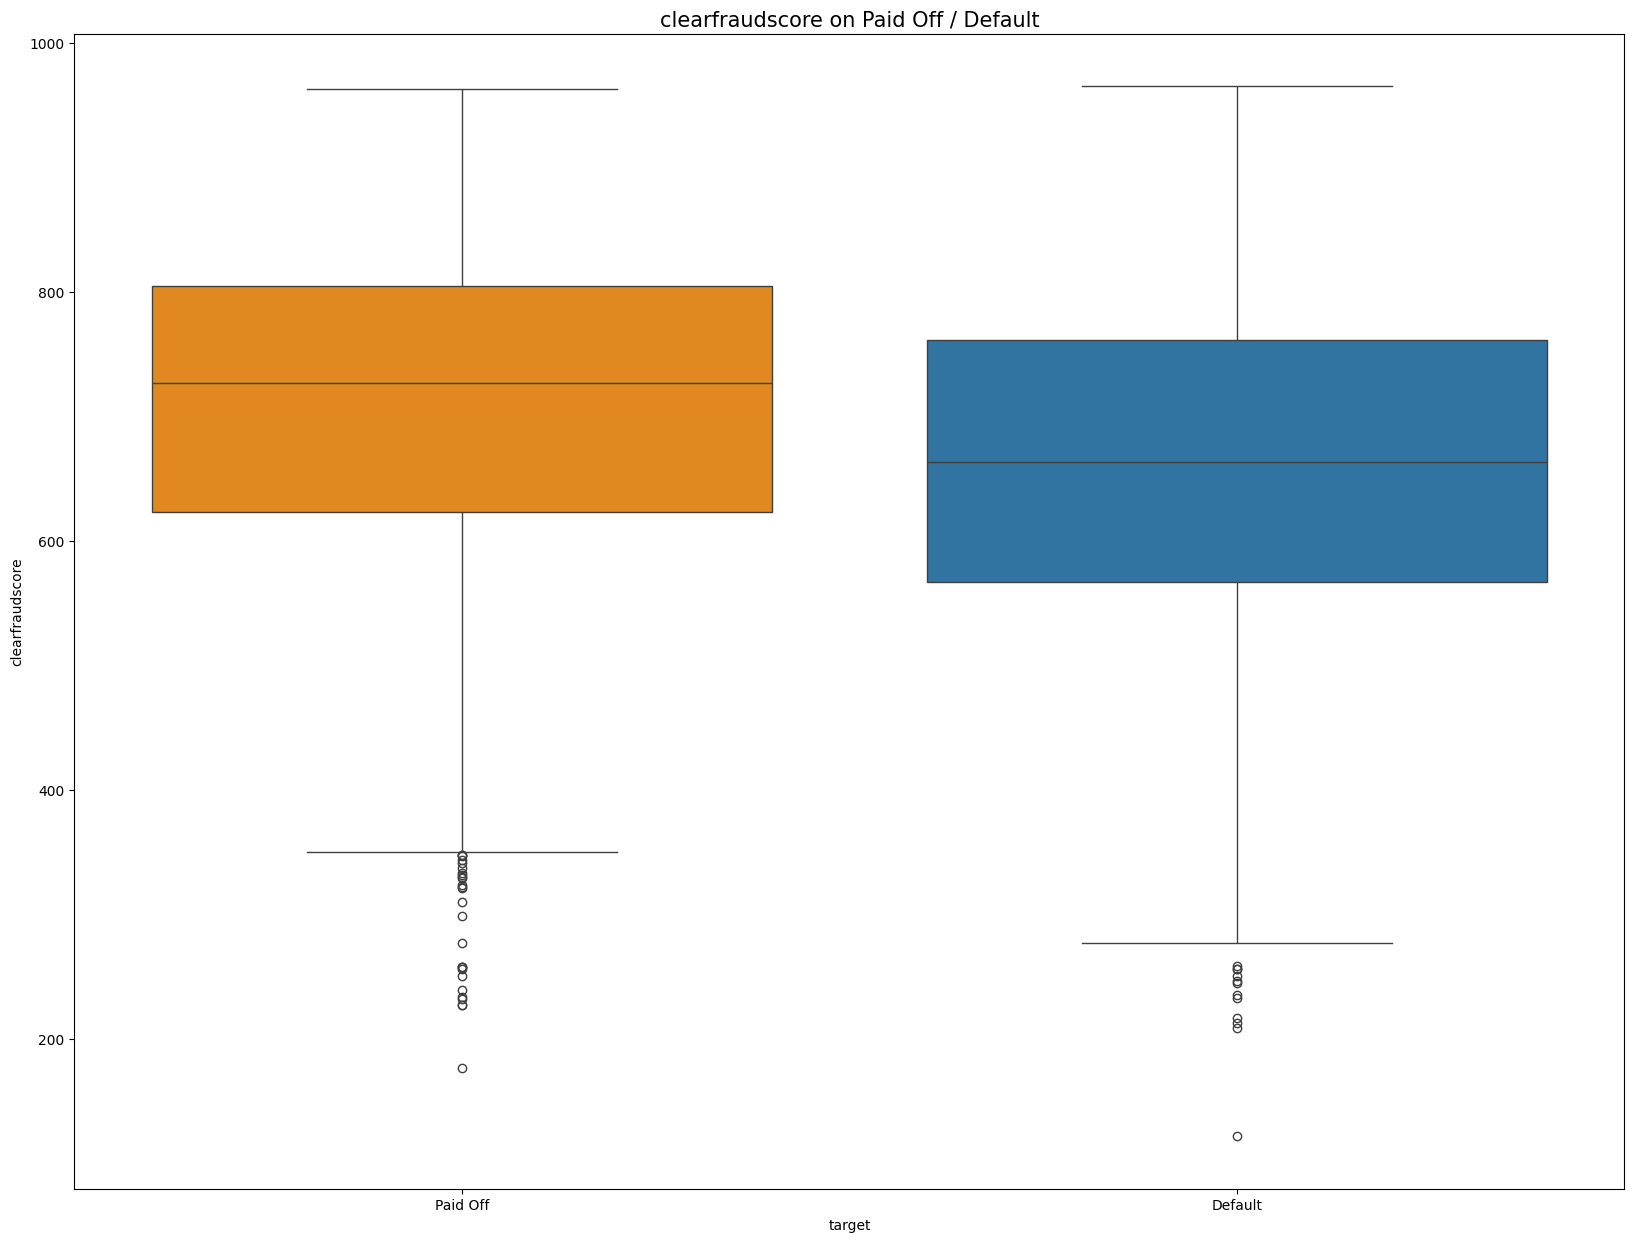

In [22]:
# Ensure the 'target' column is of integer type
df['target'] = df['target'].astype(int)

# Define the color palette for the target variable
my_pal = {0: "darkorange", 1: "tab:blue"}

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(20, 15))

# Create the boxplot with hue set to 'target'
sns.boxplot(x='target', y='clearfraudscore', data=df, palette=my_pal, hue='target', dodge=False, ax=ax)

# Set custom x-tick labels
ax.set_xticklabels(['Paid Off', 'Default'])

# Set the title of the plot
ax.set_title('clearfraudscore on Paid Off / Default', fontsize=15)

# Remove the legend
ax.legend_.remove()

plt.show()
